In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder


from lazypredict.Supervised import LazyClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier 
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix

In [2]:
df_tr=pd.read_csv("train.csv")
df_tr

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [3]:
df_tr.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 45211 entries, 0 to 45210

Data columns (total 17 columns):

 #   Column     Non-Null Count  Dtype 

---  ------     --------------  ----- 

 0   age        45211 non-null  int64 

 1   job        45211 non-null  object

 2   marital    45211 non-null  object

 3   education  45211 non-null  object

 4   default    45211 non-null  object

 5   balance    45211 non-null  int64 

 6   housing    45211 non-null  object

 7   loan       45211 non-null  object

 8   contact    45211 non-null  object

 9   day        45211 non-null  int64 

 10  month      45211 non-null  object

 11  duration   45211 non-null  int64 

 12  campaign   45211 non-null  int64 

 13  pdays      45211 non-null  int64 

 14  previous   45211 non-null  int64 

 15  poutcome   45211 non-null  object

 16  y          45211 non-null  object

dtypes: int64(7), object(10)

memory usage: 5.9+ MB


In [4]:
df_tr.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.00,45211.00,45211.00,45211.00,45211.00,45211.00,45211.00
mean,40.94,1362.27,15.81,258.16,2.76,40.20,0.58
std,10.62,3044.77,8.32,257.53,3.10,100.13,2.30
min,18.00,-8019.00,1.00,0.00,1.00,-1.00,0.00
25%,33.00,72.00,8.00,103.00,1.00,-1.00,0.00
50%,39.00,448.00,16.00,180.00,2.00,-1.00,0.00
75%,48.00,1428.00,21.00,319.00,3.00,-1.00,0.00
max,95.00,102127.00,31.00,4918.00,63.00,871.00,275.00


In [5]:
df_tr.shape

(45211, 17)

In [6]:
df_tr.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64

In [7]:
df_tr.duplicated().sum()

0

In [8]:
df_tr.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

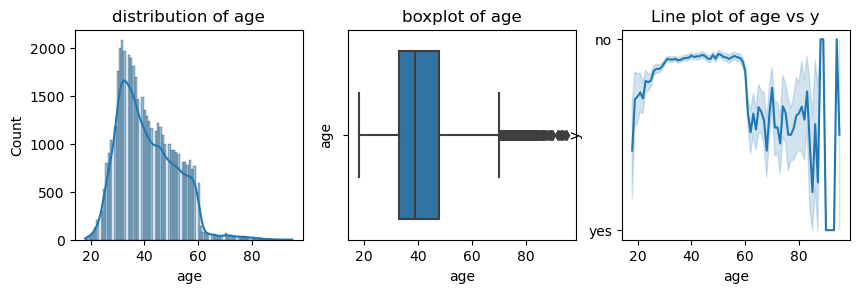

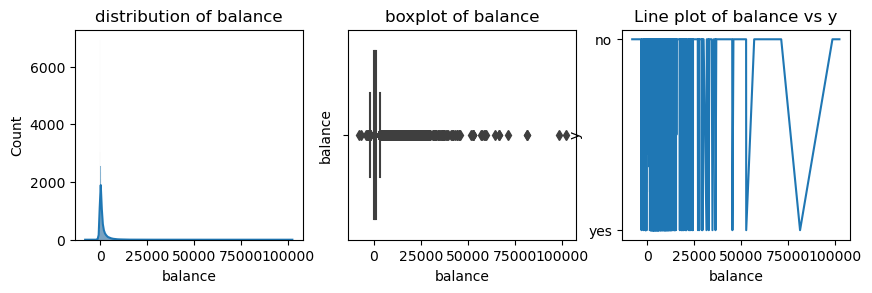

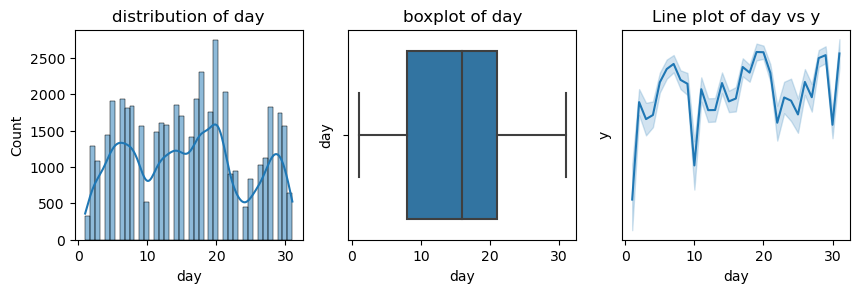

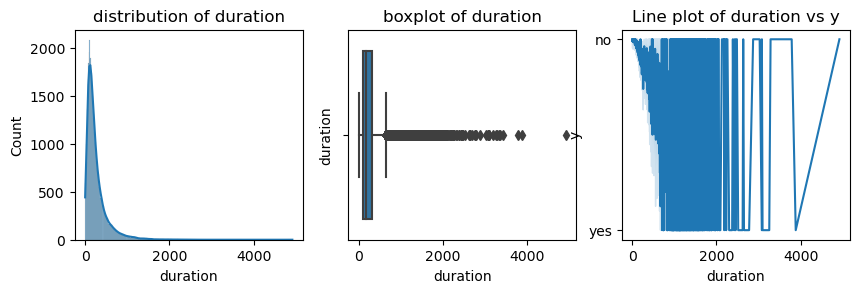

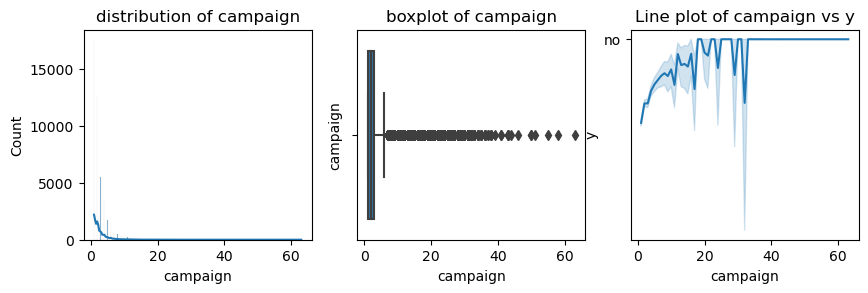

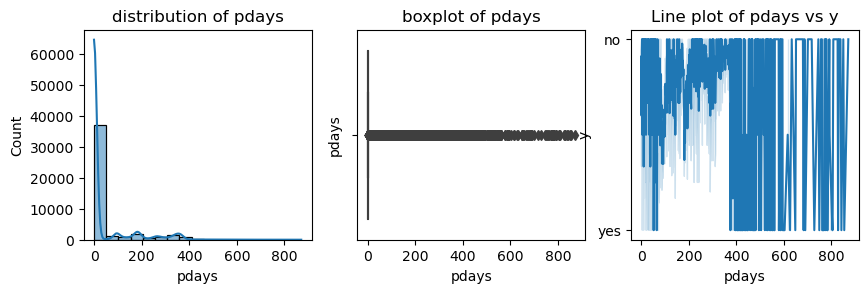

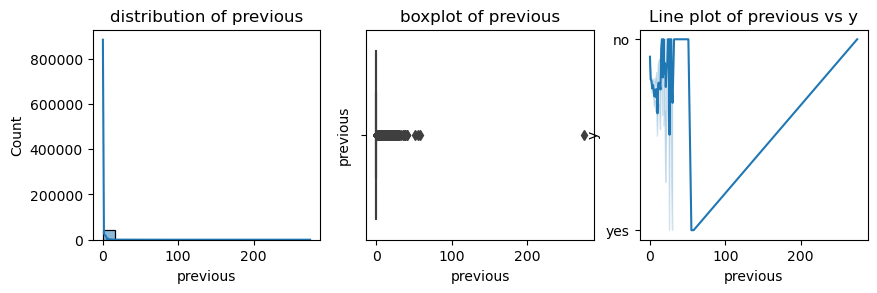

In [6]:
for i in df_tr.columns:
    if df_tr[i].dtype !="object":
        plt.figure(figsize=(10,6))
        
        plt.subplot(2,3,1)
        sns.histplot(df_tr[i], kde=True)
        plt.title(f"distribution of {i}")
        
        plt.subplot(2,3,2)
        sns.boxplot(df_tr[i])
        plt.ylabel(i)
        plt.title(f"boxplot of {i}")
        
        plt.subplot(2,3,3)
        sns.lineplot(data=df_tr, x=i, y="y")
        plt.title(f"Line plot of {i} vs y")

<Figure size 2500x1000 with 0 Axes>

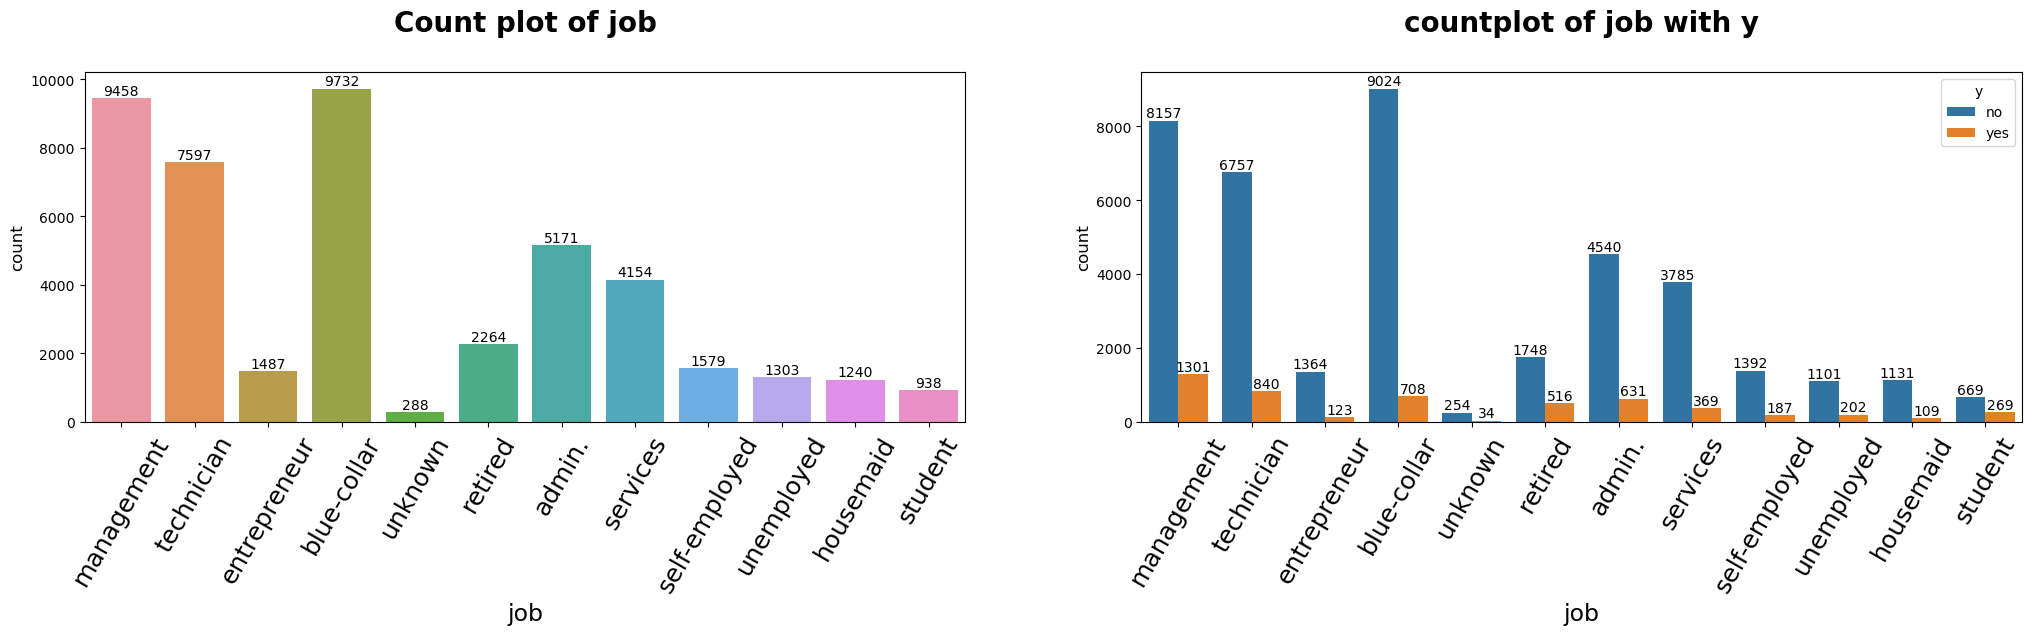

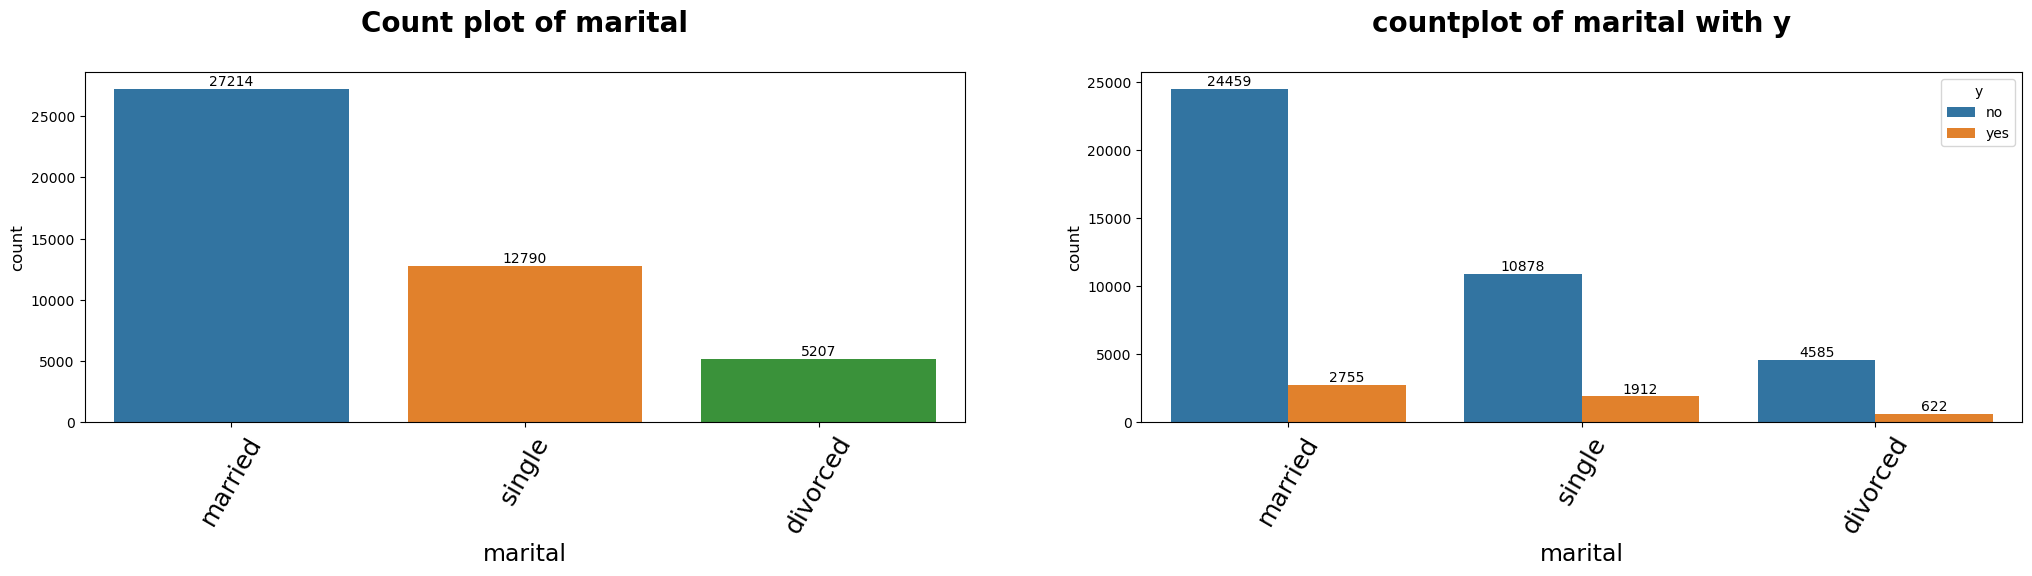

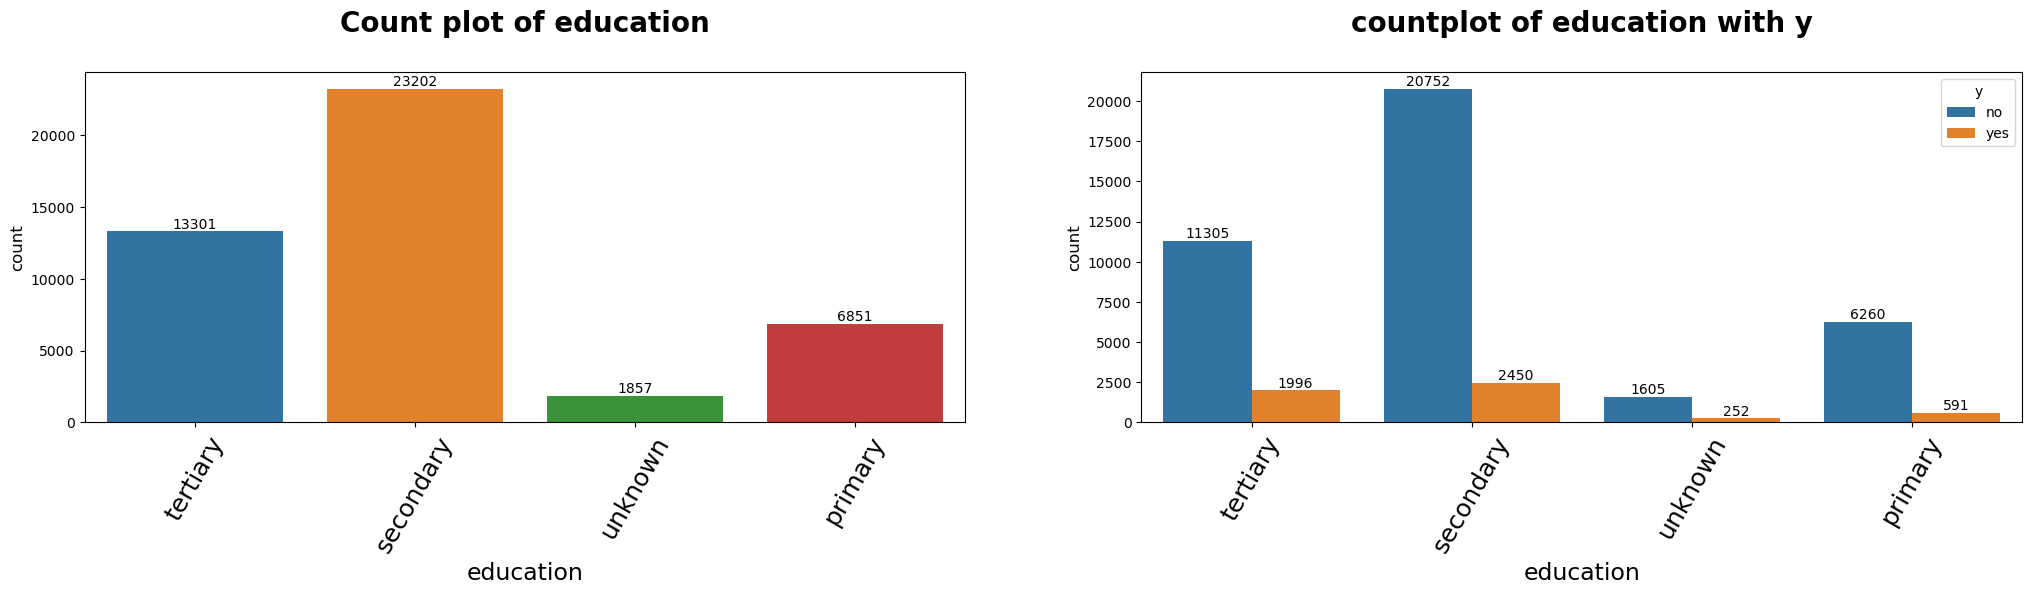

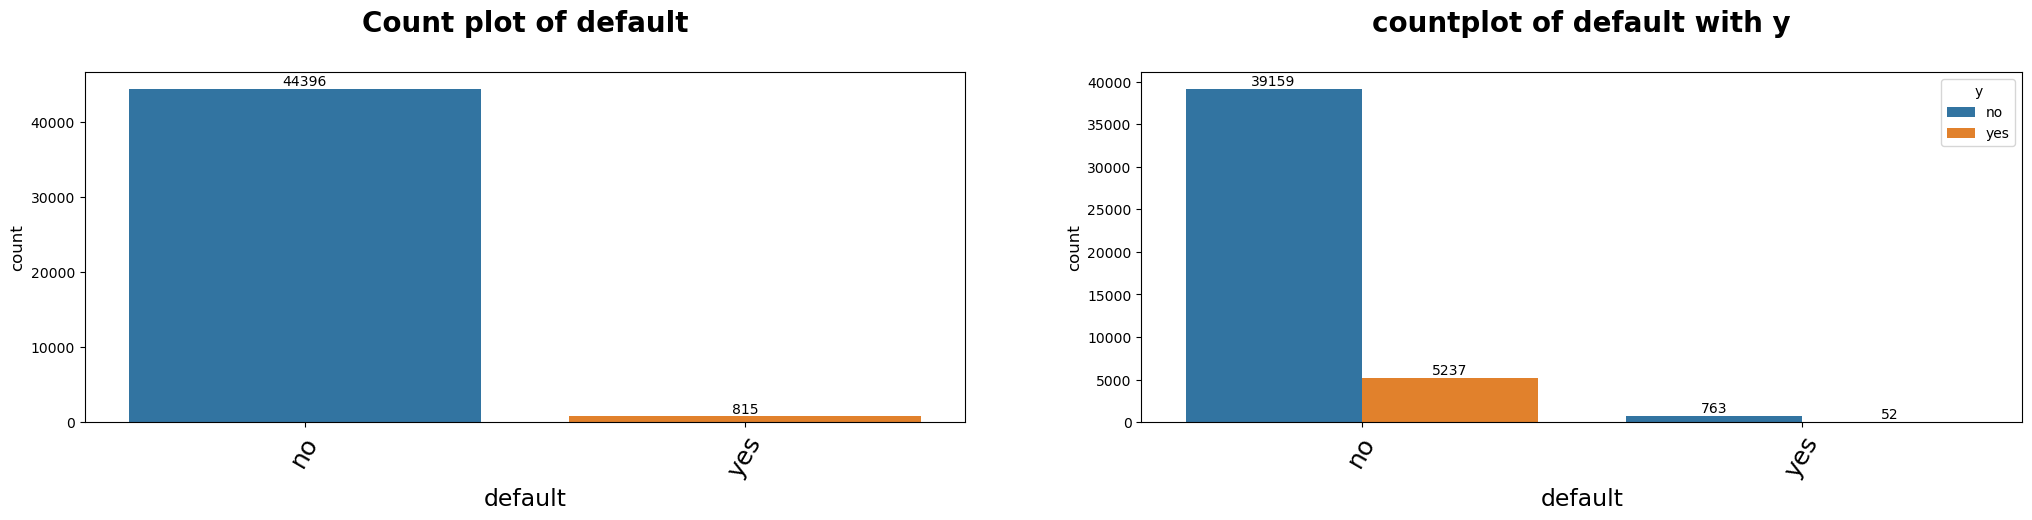

<Figure size 2500x1000 with 0 Axes>

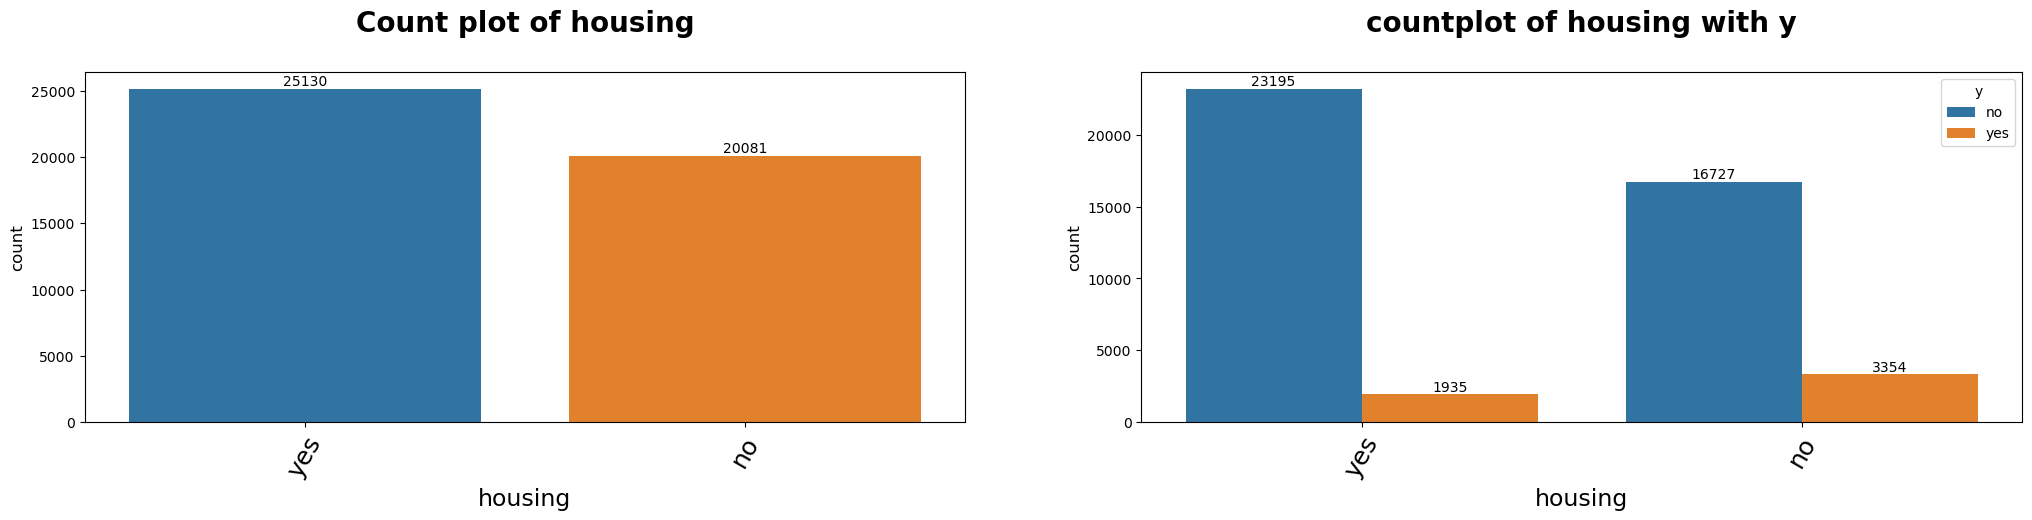

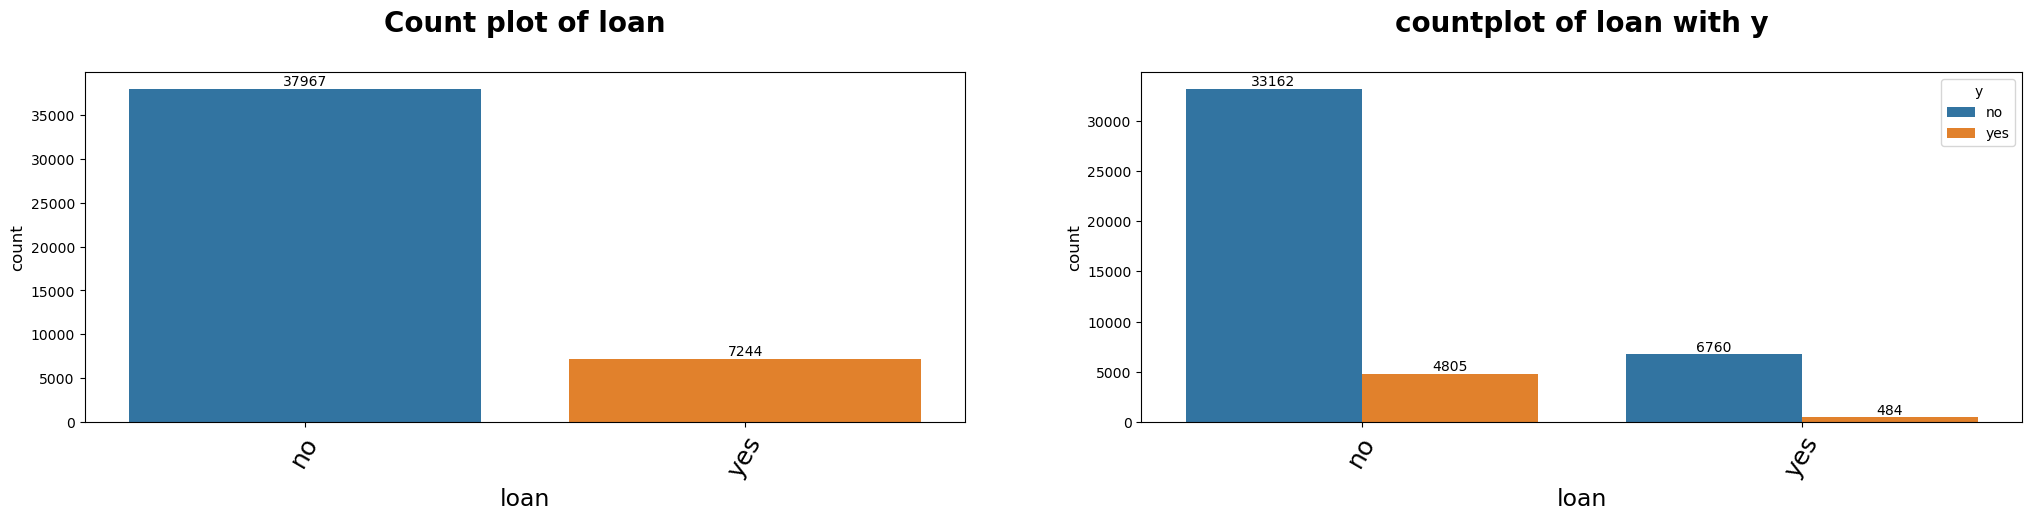

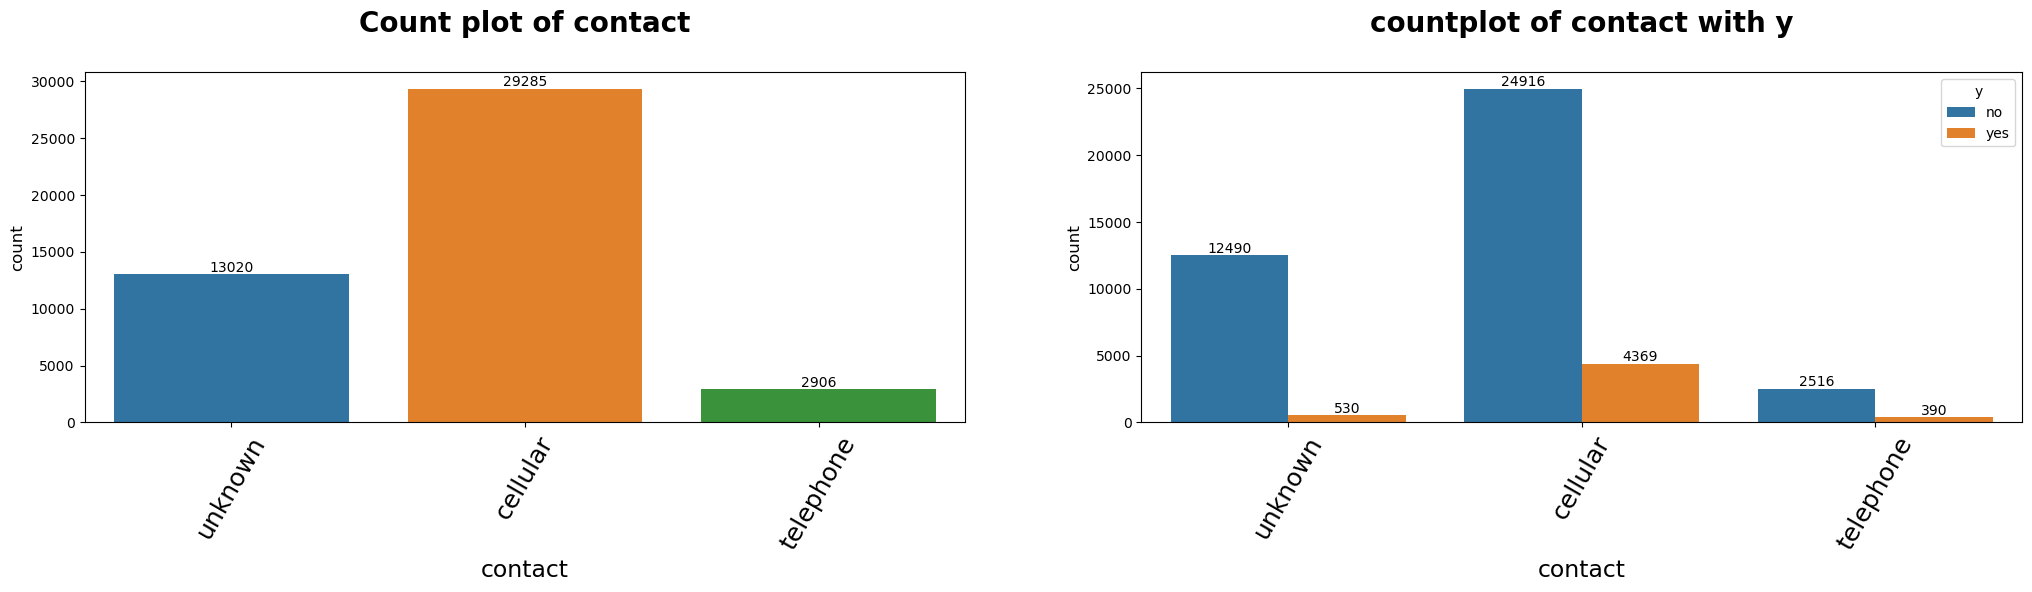

<Figure size 2500x1000 with 0 Axes>

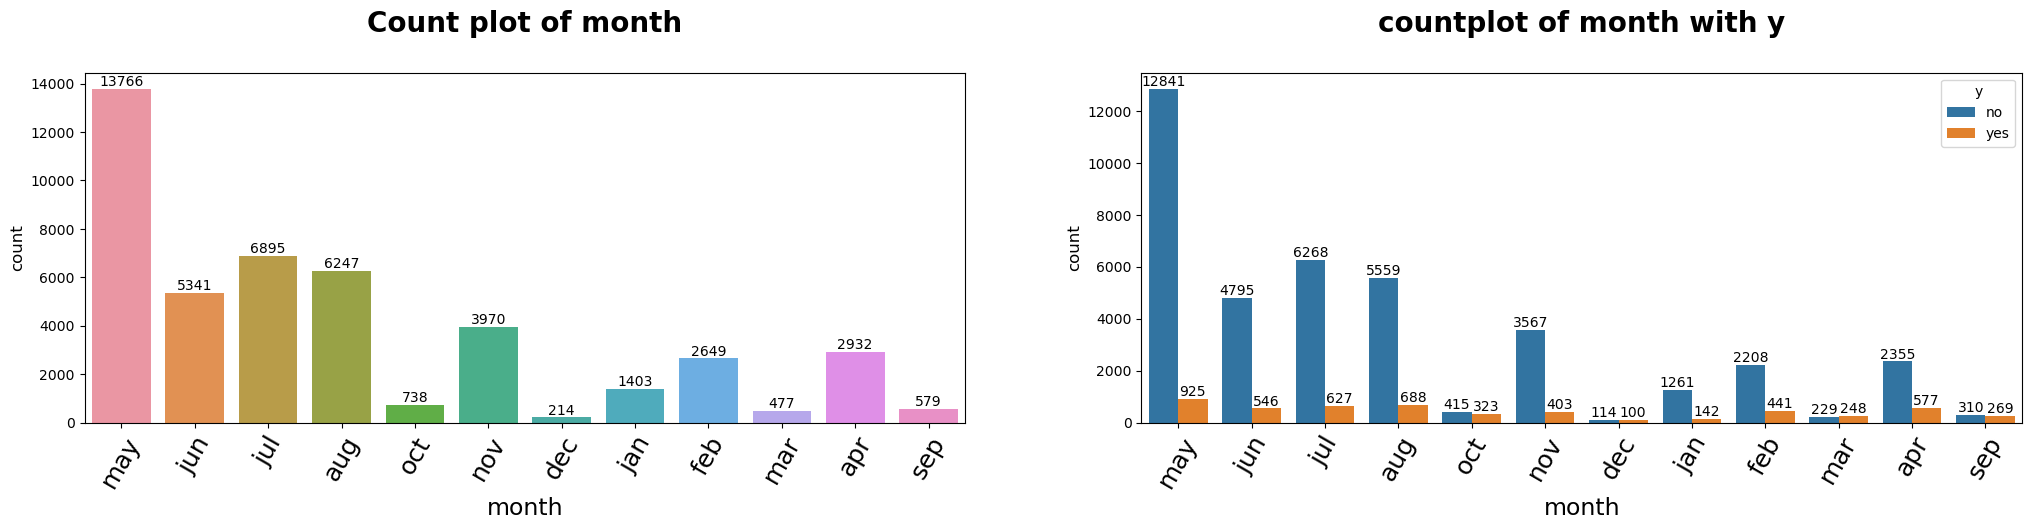

<Figure size 2500x1000 with 0 Axes>

<Figure size 2500x1000 with 0 Axes>

<Figure size 2500x1000 with 0 Axes>

<Figure size 2500x1000 with 0 Axes>

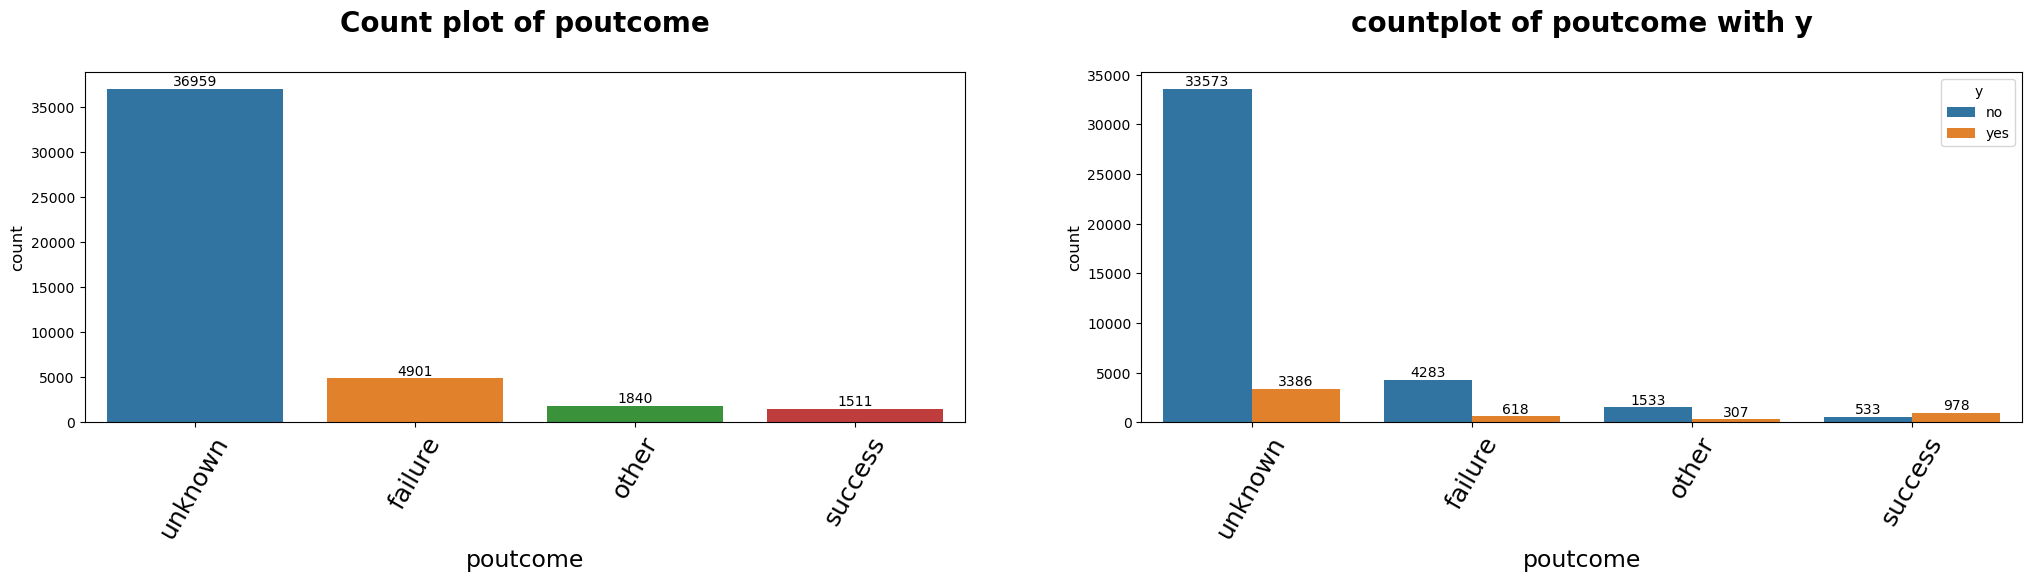

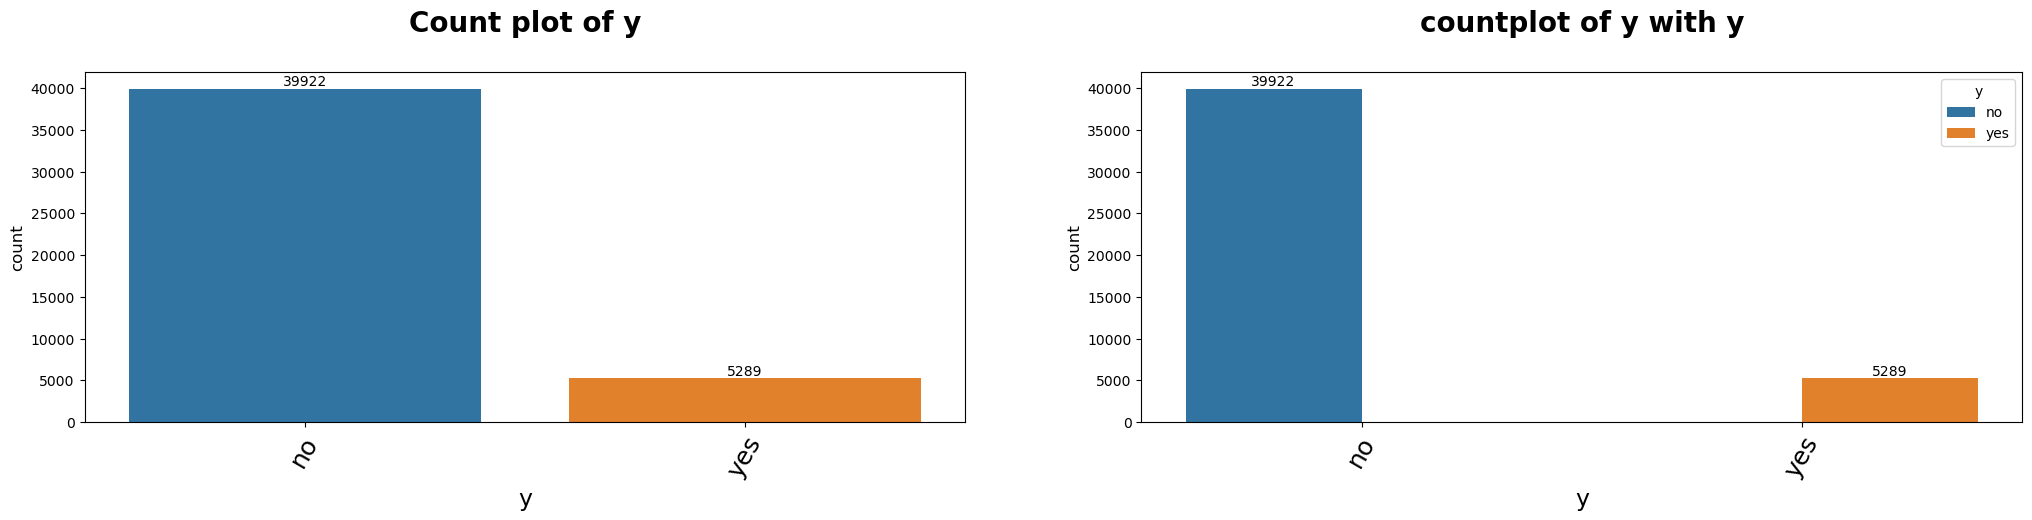

In [80]:
for i in df_tr.columns:
    plt.figure(figsize=(25,10))
    
    if df_tr[i].dtype == "object":
        plt.subplot(2,2,1)
        x=sns.countplot(data=df_tr, x=i)
        for container in x.containers:
            x.bar_label(container)
        plt.xticks(rotation=60,fontsize=18)
        plt.xlabel(i,fontsize=17)
        plt.ylabel("count",fontsize=12)
        plt.title(f"Count plot of {i}\n",fontsize=20,weight="bold")
        
        print()
        
        plt.subplot(2,2,2)
        v=sns.countplot(data=df_tr,x=i,hue="y")
        for container in v.containers:
            v.bar_label(container)
        plt.xticks(rotation=60,fontsize=18)
        plt.xlabel(i,fontsize=17)
        plt.ylabel("count",fontsize=12)
        plt.title(f"countplot of {i} with y\n",fontsize=20,weight="bold" )
        plt.show()


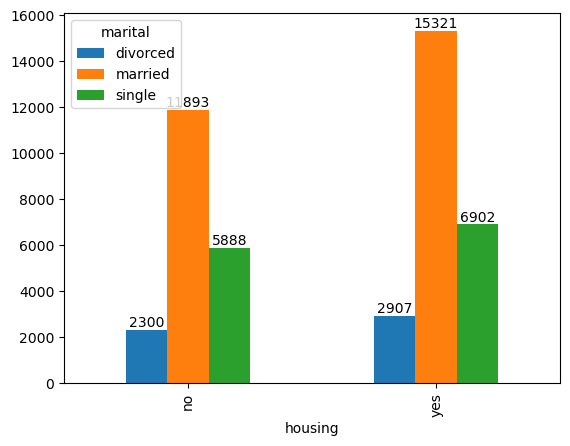

In [127]:
x=pd.crosstab(df_tr.housing,df_tr.marital).plot(kind="bar");
for i in x.containers:
    x.bar_label(i)

In [118]:
pd.crosstab(df_tr.housing,df_tr.job)

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
housing,,,,,,,,,,,,
no,1989,2684,618,842,4780,1773,814,1388,689,3482,760,262
yes,3182,7048,869,398,4678,491,765,2766,249,4115,543,26


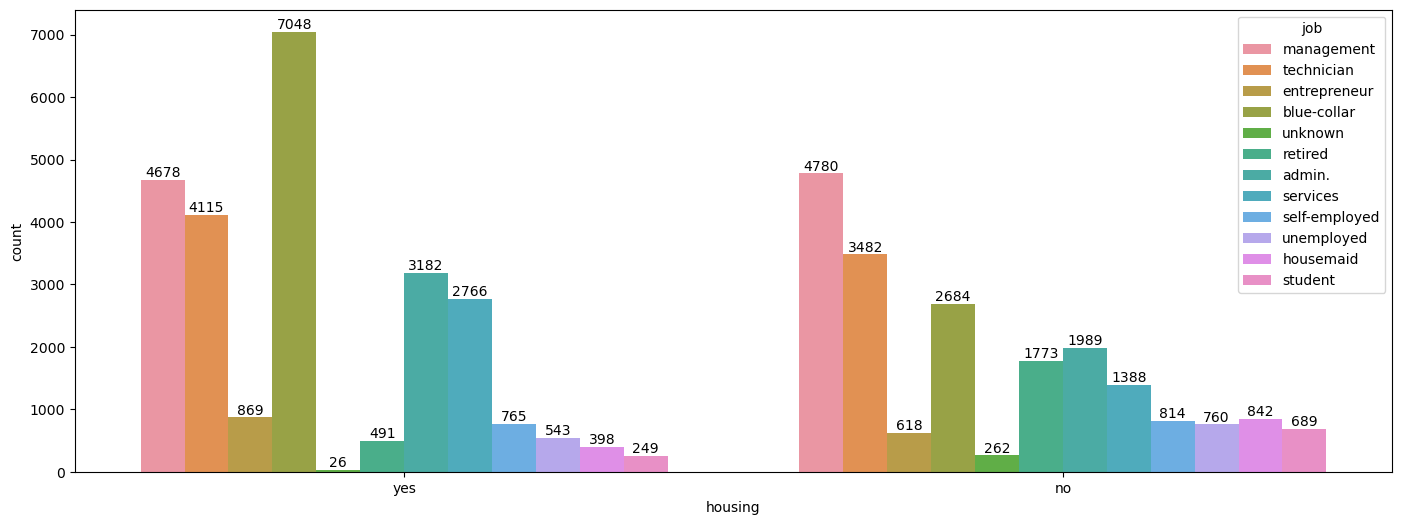

In [128]:
plt.figure(figsize=(17,6))
x=sns.countplot(data=df_tr,x="housing",hue='job')
for i in x.containers:
    x.bar_label(i)

In [131]:
pd.crosstab(df_tr.default,df_tr.job)

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
default,,,,,,,,,,,,
no,5097,9531,1432,1218,9294,2238,1546,4079,935,7467,1273,286
yes,74,201,55,22,164,26,33,75,3,130,30,2


In [132]:
pd.crosstab(df_tr.education,df_tr.job)

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
education,,,,,,,,,,,,
primary,209,3758,183,627,294,795,130,345,44,158,257,51
secondary,4219,5371,542,395,1121,984,577,3457,508,5229,728,71
tertiary,572,149,686,173,7801,366,833,202,223,1968,289,39
unknown,171,454,76,45,242,119,39,150,163,242,29,127


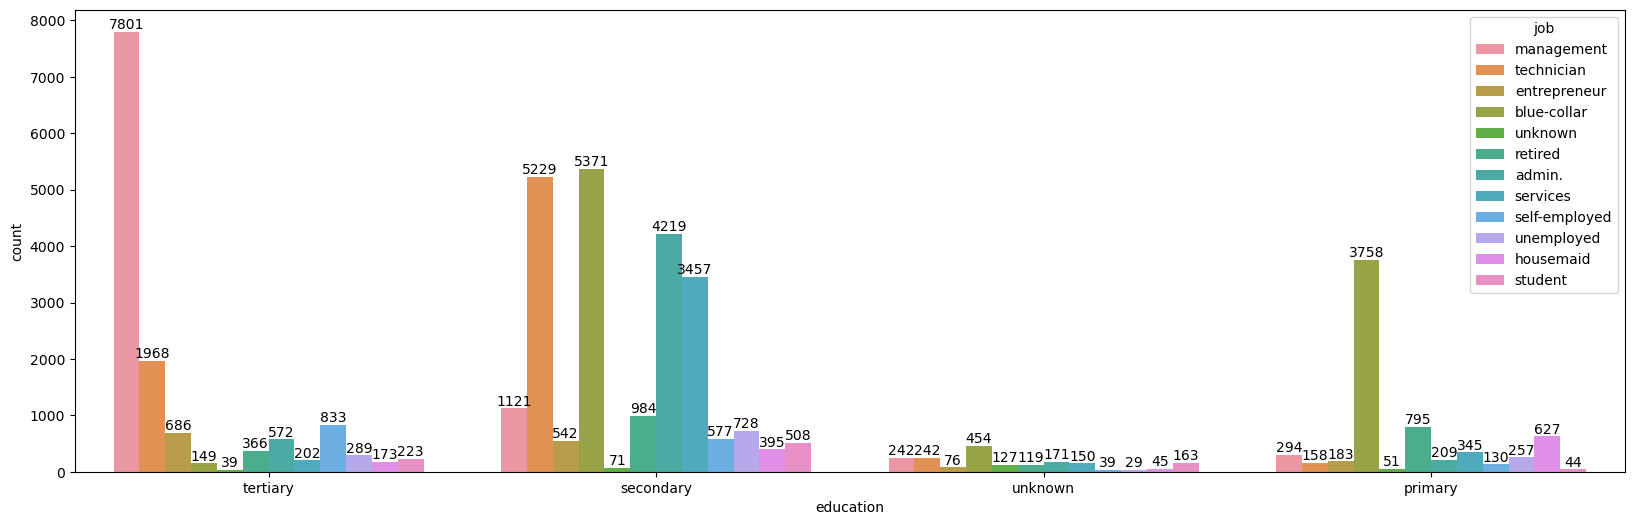

In [140]:
plt.figure(figsize=(20,6))
x=sns.countplot(data=df_tr,x="education",hue='job')
for i in x.containers:
    x.bar_label(i)

In [6]:
l=LabelEncoder()
df_tr=df_tr.apply(l.fit_transform)
df_tr.sample(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
6254,13,7,1,1,0,265,1,0,2,26,8,195,1,0,0,3,0
26752,12,4,2,2,0,6995,0,0,0,19,9,41,0,0,0,3,0
9297,20,9,1,1,0,1551,0,0,2,4,6,31,4,0,0,3,0
25293,17,4,1,2,0,1138,1,0,0,17,9,187,1,0,0,3,0
23218,21,9,2,2,0,916,0,0,0,26,1,147,3,0,0,3,0


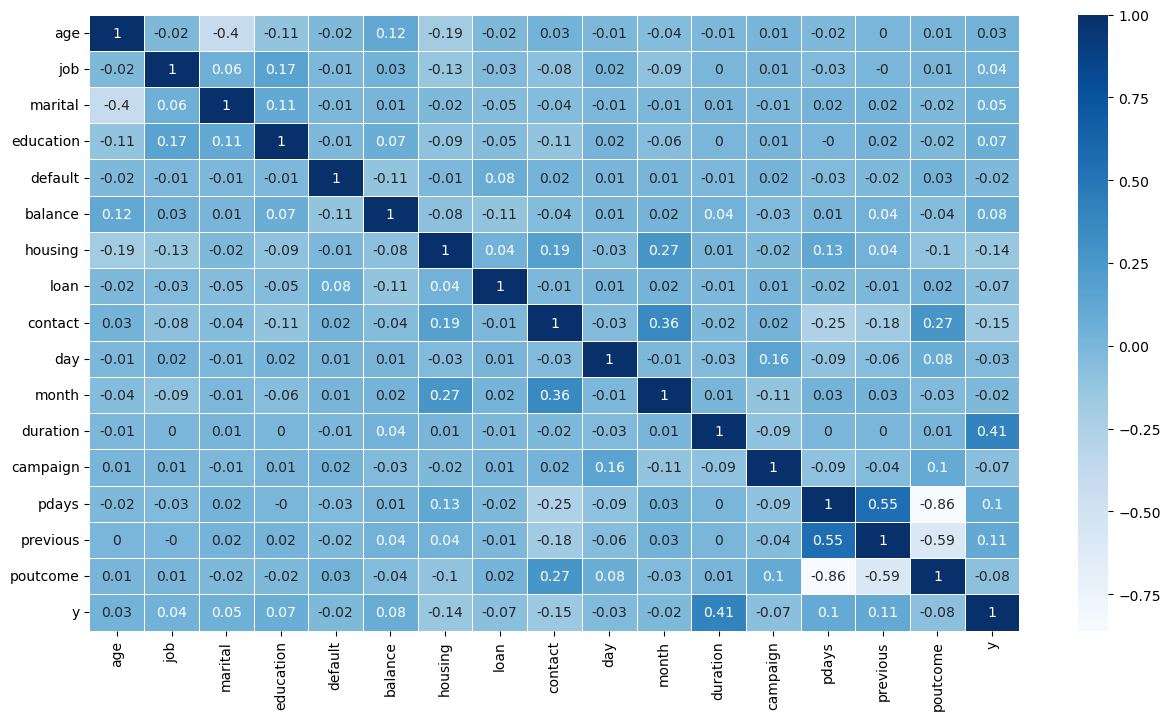

In [7]:
plt.figure(figsize=(15,8))
v=round(df_tr.corr(),2)
sns.heatmap(v,annot=True,cmap="Blues", linewidths=.5);

In [8]:
df_tst=pd.read_csv("test.csv")
df_tst.sample(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
3555,44,blue-collar,married,secondary,no,-674,yes,no,unknown,5,may,257,1,-1,0,unknown,no
927,32,technician,divorced,secondary,no,1097,yes,no,unknown,12,may,298,2,-1,0,unknown,no
2803,37,services,married,secondary,no,1,no,no,unknown,15,may,395,2,-1,0,unknown,no
2437,37,admin.,single,secondary,no,0,yes,no,cellular,16,apr,640,2,-1,0,unknown,no
785,23,student,married,tertiary,yes,-230,yes,no,cellular,18,may,259,2,-1,0,unknown,no


In [9]:
df_tst=df_tst.apply(l.fit_transform)
df_tst.sample(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
3749,18,4,1,2,0,665,0,0,0,28,4,333,1,0,0,3,0
670,21,1,1,1,0,2274,0,0,2,10,6,109,0,0,0,3,0
92,8,7,2,1,0,174,1,0,0,17,8,386,0,0,0,3,1
2603,7,4,2,2,0,268,0,0,0,12,1,397,1,0,0,3,0
1557,9,8,2,2,0,1392,0,0,0,14,3,612,3,0,0,3,1


## Define Features X and Target y

In [10]:
x_tr=df_tr.drop("y",axis=1)
y_tr=df_tr.y

In [11]:
x_tst=df_tst.drop("y",axis=1)
y_tst=df_tst.y

In [12]:
x_tst

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,11,10,1,0,0,1475,0,0,0,18,10,75,0,0,0,3
1,14,7,1,1,0,2030,1,1,0,10,8,216,0,228,4,0
2,16,4,2,2,0,1303,1,0,0,15,0,181,0,219,1,0
3,11,4,1,2,0,1352,1,1,2,2,6,195,3,0,0,3
4,40,1,1,1,0,274,1,0,2,4,8,222,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,14,7,1,1,0,119,1,0,0,29,5,325,4,0,0,3
4517,38,6,1,2,1,0,1,1,2,8,8,149,0,0,0,3
4518,38,9,1,1,0,558,0,0,0,18,1,147,10,0,0,3
4519,9,1,1,1,0,1187,0,0,0,5,3,125,3,140,3,1


## Machine Learning Algorithms

### LazyClassifier

In [12]:
modelll=LazyClassifier(verbose=1)
models=modelll.fit(x_tr,x_tst,y_tr,y_tst)

  3%|██▊                                                                                | 1/29 [00:01<00:47,  1.71s/it]

{'Model': 'AdaBoostClassifier', 'Accuracy': 0.8909533289095333, 'Balanced Accuracy': 0.5969856046065259, 'ROC AUC': 0.5969856046065258, 'F1 Score': 0.8683676638353974, 'Time taken': 1.7089135646820068}



  7%|█████▋                                                                             | 2/29 [00:04<00:57,  2.12s/it]

{'Model': 'BaggingClassifier', 'Accuracy': 0.9199292191992922, 'Balanced Accuracy': 0.7227053742802303, 'ROC AUC': 0.7227053742802303, 'F1 Score': 0.9117180517279092, 'Time taken': 2.404195547103882}

{'Model': 'BernoulliNB', 'Accuracy': 0.8641893386418934, 'Balanced Accuracy': 0.5993891554702495, 'ROC AUC': 0.5993891554702495, 'F1 Score': 0.8530363747798736, 'Time taken': 0.06106305122375488}



 14%|███████████▍                                                                       | 4/29 [00:04<00:23,  1.04it/s]

{'Model': 'CalibratedClassifierCV', 'Accuracy': 0.8863083388630834, 'Balanced Accuracy': 0.5192382437619961, 'ROC AUC': 0.5192382437619961, 'F1 Score': 0.8402441755606599, 'Time taken': 0.48098278045654297}


 28%|██████████████████████▉                                                            | 8/29 [00:05<00:08,  2.56it/s]

{'Model': 'DecisionTreeClassifier', 'Accuracy': 0.8980314089803141, 'Balanced Accuracy': 0.7520650191938579, 'ROC AUC': 0.7520650191938578, 'F1 Score': 0.8982430018784556, 'Time taken': 0.34981393814086914}

{'Model': 'DummyClassifier', 'Accuracy': 0.8847600088476001, 'Balanced Accuracy': 0.5, 'ROC AUC': 0.5, 'F1 Score': 0.8306630760216878, 'Time taken': 0.06228995323181152}

{'Model': 'ExtraTreeClassifier', 'Accuracy': 0.9188232691882326, 'Balanced Accuracy': 0.7721619481765836, 'ROC AUC': 0.7721619481765835, 'F1 Score': 0.9162920386386333, 'Time taken': 0.09373068809509277}



 31%|█████████████████████████▊                                                         | 9/29 [00:09<00:24,  1.23s/it]

{'Model': 'ExtraTreesClassifier', 'Accuracy': 0.9577527095775271, 'Balanced Accuracy': 0.8300537428023033, 'ROC AUC': 0.8300537428023033, 'F1 Score': 0.9543606689714145, 'Time taken': 4.1378092765808105}

{'Model': 'GaussianNB', 'Accuracy': 0.8641893386418934, 'Balanced Accuracy': 0.6419584932821497, 'ROC AUC': 0.6419584932821497, 'F1 Score': 0.8605458355069557, 'Time taken': 0.08016347885131836}


 45%|████████████████████████████████████▊                                             | 13/29 [00:10<00:09,  1.70it/s]

{'Model': 'KNeighborsClassifier', 'Accuracy': 0.9075425790754258, 'Balanced Accuracy': 0.6622850287907869, 'ROC AUC': 0.662285028790787, 'F1 Score': 0.8931837802381766, 'Time taken': 0.6091663837432861}



 48%|███████████████████████████████████████▌                                          | 14/29 [00:10<00:07,  2.03it/s]

{'Model': 'LinearDiscriminantAnalysis', 'Accuracy': 0.8887414288874143, 'Balanced Accuracy': 0.5773723608445297, 'ROC AUC': 0.5773723608445297, 'F1 Score': 0.861890589419288, 'Time taken': 0.11843681335449219}


 59%|████████████████████████████████████████████████                                  | 17/29 [00:14<00:10,  1.17it/s]

{'Model': 'LinearSVC', 'Accuracy': 0.8860871488608715, 'Balanced Accuracy': 0.5182785508637235, 'ROC AUC': 0.5182785508637235, 'F1 Score': 0.8397487456106495, 'Time taken': 4.3417298793792725}

{'Model': 'LogisticRegression', 'Accuracy': 0.8860871488608715, 'Balanced Accuracy': 0.5358071017274472, 'ROC AUC': 0.5358071017274472, 'F1 Score': 0.8469525915100112, 'Time taken': 0.09121108055114746}

{'Model': 'NearestCentroid', 'Accuracy': 0.8332227383322274, 'Balanced Accuracy': 0.7588440499040308, 'ROC AUC': 0.7588440499040308, 'F1 Score': 0.8520255980409893, 'Time taken': 0.04741382598876953}


 72%|███████████████████████████████████████████████████████████▍                      | 21/29 [00:15<00:03,  2.42it/s]

{'Model': 'PassiveAggressiveClassifier', 'Accuracy': 0.8281353682813537, 'Balanced Accuracy': 0.6416161228406909, 'ROC AUC': 0.6416161228406909, 'F1 Score': 0.8373587886783448, 'Time taken': 0.1003408432006836}

{'Model': 'Perceptron', 'Accuracy': 0.7619995576199956, 'Balanced Accuracy': 0.581704414587332, 'ROC AUC': 0.5817044145873321, 'F1 Score': 0.7885728570187813, 'Time taken': 0.0977182388305664}

{'Model': 'QuadraticDiscriminantAnalysis', 'Accuracy': 0.849590798495908, 'Balanced Accuracy': 0.6428901151631478, 'ROC AUC': 0.6428901151631478, 'F1 Score': 0.8512946287619956, 'Time taken': 0.08620524406433105}


 83%|███████████████████████████████████████████████████████████████████▊              | 24/29 [00:22<00:05,  1.19s/it]

{'Model': 'RandomForestClassifier', 'Accuracy': 0.9320946693209466, 'Balanced Accuracy': 0.7337538387715932, 'ROC AUC': 0.7337538387715931, 'F1 Score': 0.9229741176797958, 'Time taken': 7.474992275238037}

{'Model': 'RidgeClassifier', 'Accuracy': 0.884981198849812, 'Balanced Accuracy': 0.5042984644913627, 'ROC AUC': 0.5042984644913628, 'F1 Score': 0.832884159792879, 'Time taken': 0.0732889175415039}

{'Model': 'RidgeClassifierCV', 'Accuracy': 0.884981198849812, 'Balanced Accuracy': 0.5042984644913627, 'ROC AUC': 0.5042984644913628, 'F1 Score': 0.832884159792879, 'Time taken': 0.1250014305114746}



 86%|██████████████████████████████████████████████████████████████████████▋           | 25/29 [00:22<00:03,  1.03it/s]

{'Model': 'SGDClassifier', 'Accuracy': 0.8845388188453882, 'Balanced Accuracy': 0.499875, 'ROC AUC': 0.499875, 'F1 Score': 0.8305528815449654, 'Time taken': 0.15528249740600586}



 90%|█████████████████████████████████████████████████████████████████████████▌        | 26/29 [00:53<00:22,  7.55s/it]

{'Model': 'SVC', 'Accuracy': 0.896040698960407, 'Balanced Accuracy': 0.5731504318618043, 'ROC AUC': 0.5731504318618043, 'F1 Score': 0.864593498849046, 'Time taken': 30.187413692474365}



 97%|███████████████████████████████████████████████████████████████████████████████▏  | 28/29 [00:53<00:04,  4.70s/it]

{'Model': 'XGBClassifier', 'Accuracy': 0.9128511391285113, 'Balanced Accuracy': 0.7003421305182342, 'ROC AUC': 0.7003421305182341, 'F1 Score': 0.9032077734128903, 'Time taken': 0.5350649356842041}

[LightGBM] [Info] Number of positive: 5289, number of negative: 39922

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001918 seconds.

You can set `force_row_wise=true` to remove the overhead.

And if memory is not enough, you can set `force_col_wise=true`.

[LightGBM] [Info] Total Bins 1002

[LightGBM] [Info] Number of data points in the train set: 45211, number of used features: 16

[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.116985 -> initscore=-2.021298

[LightGBM] [Info] Start training from score -2.021298


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:53<00:00,  1.86s/it]

{'Model': 'LGBMClassifier', 'Accuracy': 0.9090909090909091, 'Balanced Accuracy': 0.6606559500959693, 'ROC AUC': 0.6606559500959693, 'F1 Score': 0.8940017209597256, 'Time taken': 0.2860584259033203}


In [13]:
print(models)

(                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \

Model                                                                           

ExtraTreesClassifier               0.96               0.83     0.83      0.95   

ExtraTreeClassifier                0.92               0.77     0.77      0.92   

NearestCentroid                    0.83               0.76     0.76      0.85   

DecisionTreeClassifier             0.90               0.75     0.75      0.90   

RandomForestClassifier             0.93               0.73     0.73      0.92   

BaggingClassifier                  0.92               0.72     0.72      0.91   

XGBClassifier                      0.91               0.70     0.70      0.90   

KNeighborsClassifier               0.91               0.66     0.66      0.89   

LGBMClassifier                     0.91               0.66     0.66      0.89   

QuadraticDiscriminantAnalysis      0.85               0.64     0.64      0.85   

GaussianNB     

### ExtraTreesClassifier

In [15]:
EX=ExtraTreesClassifier(n_estimators=100,random_state=42)
EX.fit(x_tr,y_tr)

ExtraTreesClassifier(random_state=42)

In [16]:
EX.score(x_tr,y_tr)

1.0

In [17]:
EX.score(x_tst,y_tst)

0.9577527095775271

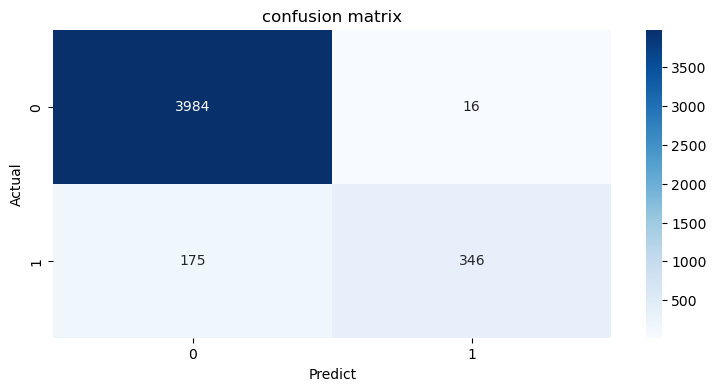

In [19]:
plt.figure(figsize=(9,4))
P=EX.predict(x_tst)
EC=confusion_matrix(y_tst,P)
sns.heatmap(EC,annot=True, fmt='d', cmap='Blues')
plt.title("confusion matrix")
plt.xlabel("Predict")
plt.ylabel("Actual");

### LogisticRegressio

In [52]:
model=LogisticRegression(max_iter=1000,C=3,penalty="l2")
model.fit(x_tr,y_tr)

LogisticRegression(C=3, max_iter=1000)

In [53]:
model.score(x_tr,y_tr)

0.8898055782884696

In [54]:
model.score(x_tst,y_tst)

0.8858659588586596

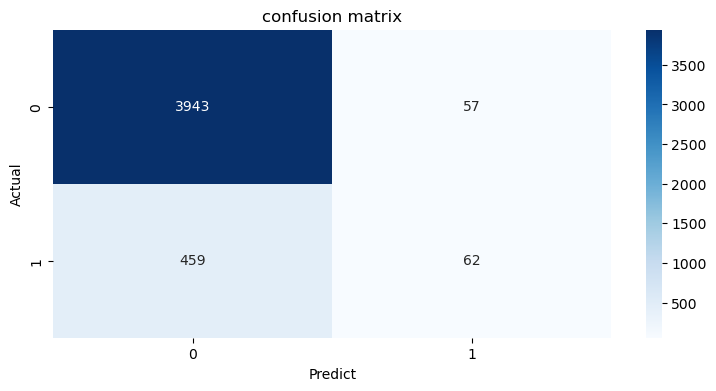

In [71]:
plt.figure(figsize=(9,4))
pr=model.predict(x_tst)
c=confusion_matrix(y_tst,pr)
sns.heatmap(c,annot=True, fmt='d', cmap='Blues')
plt.title("confusion matrix")
plt.xlabel("Predict")
plt.ylabel("Actual");

### SVC

In [10]:
model1=SVC(gamma="auto",C=5)
model1.fit(x_tr,y_tr)

SVC(C=5, gamma='auto')

In [11]:
model1.score(x_tr,y_tr)

1.0

In [12]:
model1.score(x_tst,y_tst)

0.8845388188453882

In [14]:
pp=model1.predict(x_tst)

In [16]:
cc=confusion_matrix(y_tst,pp)

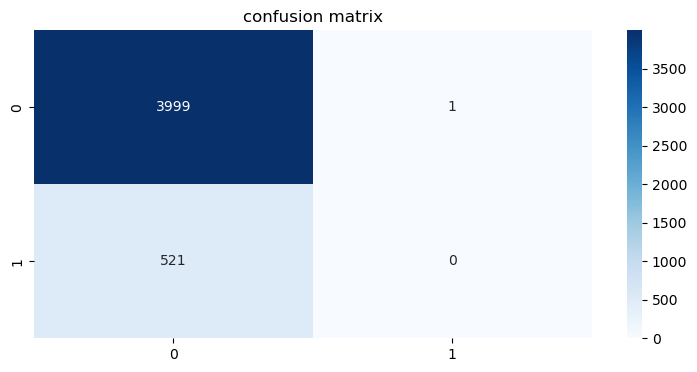

In [22]:
plt.figure(figsize=(9,4))
plt.title("confusion matrix")
plt.xlabel("Predict")
plt.ylabel("Actual")
sns.heatmap(cc,annot=True,fmt="d",cmap='Blues');

### DecisionTreeClassifier

In [41]:
model2=DecisionTreeClassifier(random_state=15)
model2.fit(x_tr,y_tr)

DecisionTreeClassifier(random_state=15)

In [42]:
model2.score(x_tr,y_tr)

1.0

In [43]:
model2.score(x_tst,y_tst)

0.9033399690333996

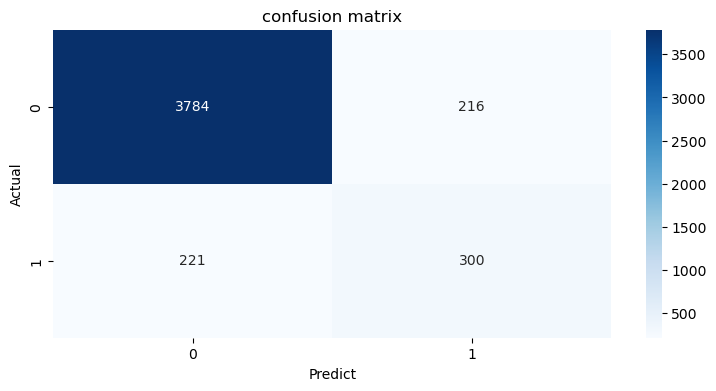

In [44]:
plt.figure(figsize=(9,4))
pr=model2.predict(x_tst)
c=confusion_matrix(y_tst,pr)
sns.heatmap(c,annot=True, fmt='d', cmap='Blues')
plt.title("confusion matrix")
plt.xlabel("Predict")
plt.ylabel("Actual");

### RandomForestClassifier

In [45]:
model3=RandomForestClassifier(n_estimators=1000,random_state=15)
model3.fit(x_tr,y_tr)

RandomForestClassifier(n_estimators=1000, random_state=15)

In [46]:
model3.score(x_tr,y_tr)

1.0

In [47]:
model3.score(x_tst,y_tst)

0.9365184693651847

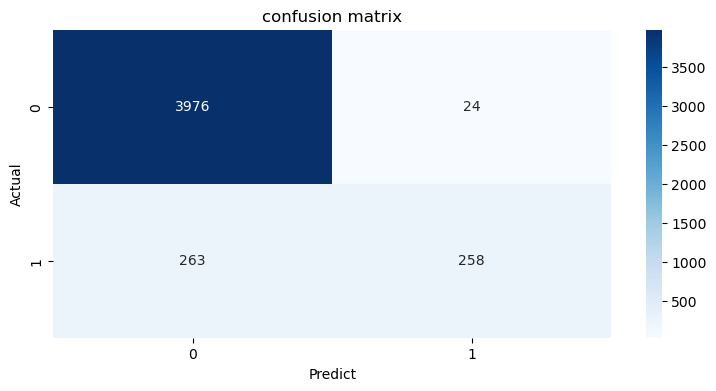

In [50]:
plt.figure(figsize=(9,4))
p3=model3.predict(x_tst)
c3=confusion_matrix(y_tst,p3)
sns.heatmap(c3,annot=True, fmt='d', cmap='Blues')
plt.title("confusion matrix")
plt.xlabel("Predict")
plt.ylabel("Actual");

### XGBClassifier 

In [70]:
model4=XGBClassifier(n_estimators=1000, learning_rate=0.01, max_depth=7)
model4.fit(x_tr,y_tr,early_stopping_rounds=5,eval_set=[(x_tst,y_tst)])

[0]	validation_0-logloss:0.36995

[1]	validation_0-logloss:0.36777

[2]	validation_0-logloss:0.36564

[3]	validation_0-logloss:0.36356

[4]	validation_0-logloss:0.36153

[5]	validation_0-logloss:0.35954

[6]	validation_0-logloss:0.35764

[7]	validation_0-logloss:0.35575

[8]	validation_0-logloss:0.35393

[9]	validation_0-logloss:0.35214

[10]	validation_0-logloss:0.35036

[11]	validation_0-logloss:0.34859

[12]	validation_0-logloss:0.34690

[13]	validation_0-logloss:0.34516

[14]	validation_0-logloss:0.34344

[15]	validation_0-logloss:0.34174

[16]	validation_0-logloss:0.34012

[17]	validation_0-logloss:0.33849

[18]	validation_0-logloss:0.33697

[19]	validation_0-logloss:0.33551

[20]	validation_0-logloss:0.33395

[21]	validation_0-logloss:0.33243

[22]	validation_0-logloss:0.33102

[23]	validation_0-logloss:0.32963

[24]	validation_0-logloss:0.32828

[25]	validation_0-logloss:0.32689

[26]	validation_0-logloss:0.32556

[27]	validation_0-logloss:0.32427

[28]	validation_0-logloss:0.32

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [71]:
model4.score(x_tr,y_tr)

0.93306938576895

In [72]:
model4.score(x_tst,y_tst)

0.9086485290864853

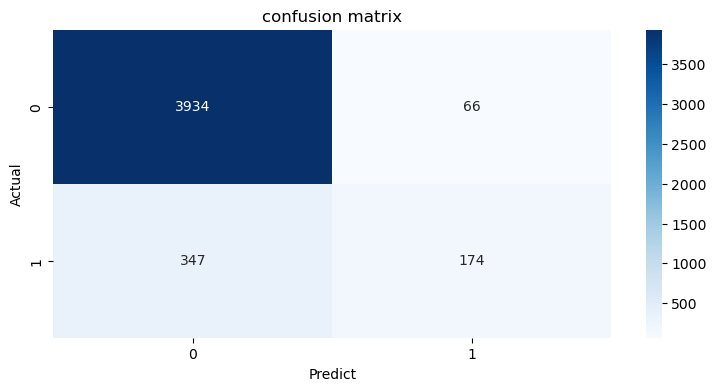

In [73]:
plt.figure(figsize=(9,4))
p4=model4.predict(x_tst)
c4=confusion_matrix(y_tst,p4)
sns.heatmap(c4,annot=True, fmt='d', cmap='Blues')
plt.title("confusion matrix")
plt.xlabel("Predict")
plt.ylabel("Actual");

### KNN

In [79]:
model5=KNeighborsClassifier(n_neighbors=100)
model5.fit(x_tr,y_tr)

KNeighborsClassifier(n_neighbors=100)

In [80]:
model5.score(x_tr,y_tr)

0.889341089557851

In [81]:
model5.score(x_tst,y_tst)

0.8847600088476001

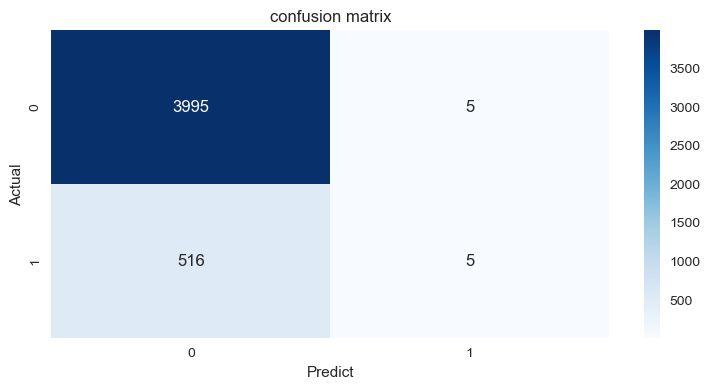

In [82]:
plt.figure(figsize=(9,4))
p5=model5.predict(x_tst)
c5=confusion_matrix(y_tst,p5)
sns.heatmap(c5,annot=True, fmt='d', cmap='Blues')
plt.title("confusion matrix")
plt.xlabel("Predict")
plt.ylabel("Actual");